In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import torchvision

c:\MLProjects\NN Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64
image_size = 64
nz = 100
epochs = 20
lr = 0.0002
beta1 = 0.
    
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [3]:
class Generator(nn.Module):
    def __init__(self, nz, ngf=64, nc=1):
        super().__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(ngf*8, ngf*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*4),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(ngf*4, ngf*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*2),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(ngf*2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

In [4]:
class Discriminator(nn.Module):
    def __init__(self, nc=1, ndf=64):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf*2, ndf*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf*4, ndf*8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf*8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x).view(-1)


In [5]:
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

real_label = 1.
fake_label = 0.

  0%|                                                                             | 1/938 [00:01<16:55,  1.08s/it]

[0/20][0/938] Loss_D: 1.3721, Loss_G: 2.2803


 11%|████████                                                                   | 101/938 [01:43<14:04,  1.01s/it]

[0/20][100/938] Loss_D: 0.0031, Loss_G: 7.1867


 21%|████████████████                                                           | 201/938 [03:32<14:43,  1.20s/it]

[0/20][200/938] Loss_D: 100.0000, Loss_G: 0.0000


 32%|████████████████████████                                                   | 301/938 [05:24<12:03,  1.14s/it]

[0/20][300/938] Loss_D: 100.0000, Loss_G: 0.0000


 43%|████████████████████████████████                                           | 401/938 [07:13<08:10,  1.10it/s]

[0/20][400/938] Loss_D: 100.0000, Loss_G: 0.0000


 53%|████████████████████████████████████████                                   | 501/938 [08:45<06:53,  1.06it/s]

[0/20][500/938] Loss_D: 100.0000, Loss_G: 0.0000


 64%|████████████████████████████████████████████████                           | 601/938 [10:20<05:00,  1.12it/s]

[0/20][600/938] Loss_D: 100.0000, Loss_G: 0.0000


 75%|████████████████████████████████████████████████████████                   | 701/938 [12:00<04:00,  1.01s/it]

[0/20][700/938] Loss_D: 100.0000, Loss_G: 0.0000


 85%|████████████████████████████████████████████████████████████████           | 801/938 [13:37<02:16,  1.01it/s]

[0/20][800/938] Loss_D: 100.0000, Loss_G: 0.0000


 96%|████████████████████████████████████████████████████████████████████████   | 901/938 [15:21<00:39,  1.06s/it]

[0/20][900/938] Loss_D: 100.0000, Loss_G: 0.0000


100%|███████████████████████████████████████████████████████████████████████████| 938/938 [16:01<00:00,  1.03s/it]


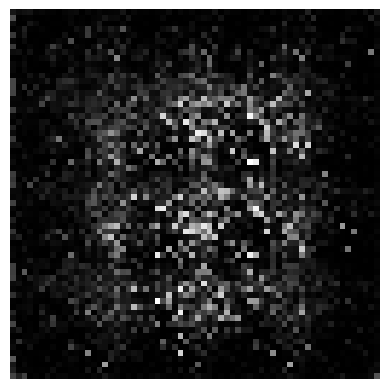

  0%|                                                                             | 1/938 [00:00<15:19,  1.02it/s]

[1/20][0/938] Loss_D: 100.0000, Loss_G: 0.0000


 11%|████████                                                                   | 101/938 [01:36<12:46,  1.09it/s]

[1/20][100/938] Loss_D: 100.0000, Loss_G: 0.0000


 21%|████████████████                                                           | 201/938 [03:06<12:31,  1.02s/it]

[1/20][200/938] Loss_D: 100.0000, Loss_G: 0.0000


 32%|████████████████████████                                                   | 301/938 [04:36<09:19,  1.14it/s]

[1/20][300/938] Loss_D: 100.0000, Loss_G: 0.0000


 43%|████████████████████████████████                                           | 401/938 [06:12<08:46,  1.02it/s]

[1/20][400/938] Loss_D: 100.0000, Loss_G: 0.0000


 53%|████████████████████████████████████████                                   | 501/938 [07:48<07:32,  1.04s/it]

[1/20][500/938] Loss_D: 100.0000, Loss_G: 0.0000


 64%|████████████████████████████████████████████████                           | 601/938 [09:22<05:12,  1.08it/s]

[1/20][600/938] Loss_D: 100.0000, Loss_G: 0.0000


 75%|████████████████████████████████████████████████████████                   | 701/938 [11:05<04:04,  1.03s/it]

[1/20][700/938] Loss_D: 100.0000, Loss_G: 0.0000


 85%|████████████████████████████████████████████████████████████████           | 801/938 [12:49<02:21,  1.04s/it]

[1/20][800/938] Loss_D: 100.0000, Loss_G: 0.0000


 96%|████████████████████████████████████████████████████████████████████████   | 901/938 [14:32<00:36,  1.01it/s]

[1/20][900/938] Loss_D: 100.0000, Loss_G: 0.0000


100%|███████████████████████████████████████████████████████████████████████████| 938/938 [15:08<00:00,  1.03it/s]


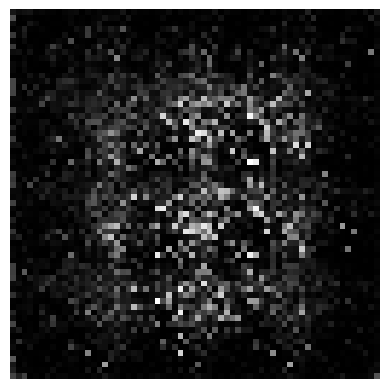

  0%|                                                                             | 1/938 [00:01<16:08,  1.03s/it]

[2/20][0/938] Loss_D: 100.0000, Loss_G: 0.0000


 11%|████████                                                                   | 101/938 [14:19<14:22,  1.03s/it]

[2/20][100/938] Loss_D: 100.0000, Loss_G: 0.0000


 21%|████████████████                                                           | 201/938 [15:53<10:26,  1.18it/s]

[2/20][200/938] Loss_D: 100.0000, Loss_G: 0.0000


 32%|████████████████████████                                                   | 301/938 [17:18<08:48,  1.20it/s]

[2/20][300/938] Loss_D: 100.0000, Loss_G: 0.0000


 43%|████████████████████████████████                                           | 401/938 [18:45<07:43,  1.16it/s]

[2/20][400/938] Loss_D: 100.0000, Loss_G: 0.0000


 53%|████████████████████████████████████████                                   | 501/938 [20:19<06:07,  1.19it/s]

[2/20][500/938] Loss_D: 100.0000, Loss_G: 0.0000


 64%|████████████████████████████████████████████████                           | 601/938 [21:48<04:44,  1.18it/s]

[2/20][600/938] Loss_D: 100.0000, Loss_G: 0.0000


 75%|████████████████████████████████████████████████████████                   | 701/938 [23:30<04:11,  1.06s/it]

[2/20][700/938] Loss_D: 100.0000, Loss_G: 0.0000


 85%|████████████████████████████████████████████████████████████████           | 801/938 [25:12<02:21,  1.03s/it]

[2/20][800/938] Loss_D: 100.0000, Loss_G: 0.0000


 96%|████████████████████████████████████████████████████████████████████████   | 901/938 [26:47<00:35,  1.05it/s]

[2/20][900/938] Loss_D: 100.0000, Loss_G: 0.0000


100%|███████████████████████████████████████████████████████████████████████████| 938/938 [27:24<00:00,  1.75s/it]


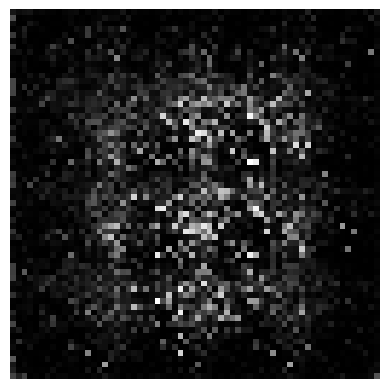

  0%|                                                                             | 1/938 [00:01<24:54,  1.59s/it]

[3/20][0/938] Loss_D: 100.0000, Loss_G: 0.0000


  4%|███▏                                                                        | 40/938 [00:42<14:42,  1.02it/s]

In [ ]:
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

for epoch in range(epochs):
    for i, (real_images, _) in enumerate(tqdm(dataloader)):
        real_images = real_images.to(device)
        b_size = real_images.size(0)

        netD.zero_grad()
        
        label = torch.full((b_size,), real_label, device=device)
        
        output = netD(real_images)
        lossD_real = criterion(output, label)
        lossD_real.backward()

        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake_images = netG(noise)
        label.fill_(fake_label)
        
        output = netD(fake_images.detach())
        lossD_fake = criterion(output, label)
        lossD_fake.backward()
        optimizerD.step()

        lossD = lossD_real + lossD_fake

        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake_images)

        lossG = criterion(output, label)
        lossG.backward()
        optimizerG.step()

        if i % 100 == 0:
            print(f"[{epoch}/{epochs}][{i}/{len(dataloader)}] Loss_D: {lossD.item():.4f}, Loss_G: {lossG.item():.4f}")

    with torch.no_grad():
        fake = netG(fixed_noise).detach().cpu()
    single_img = fake[0] 
    plt.imshow(single_img[0], cmap="gray")
    plt.axis("off")
    plt.show()